In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

layouts_dir = os.path.join(os.getcwd(), 'detector_layouts')

In [7]:
roach = 1
layout = pd.read_csv(os.path.join(layouts_dir, f'layout_roach{roach}.csv'), index_col=0)

layout

,x,y
kid,,
0,25000,-21650.635095
1,-25000,-21650.635095
2,-30000,12990.381057
3,30000,12990.381057
4,-30000,-12990.381057
...,...,...
376,-2500,34641.016151
377,-2500,-34641.016151
378,22500,-25980.762114


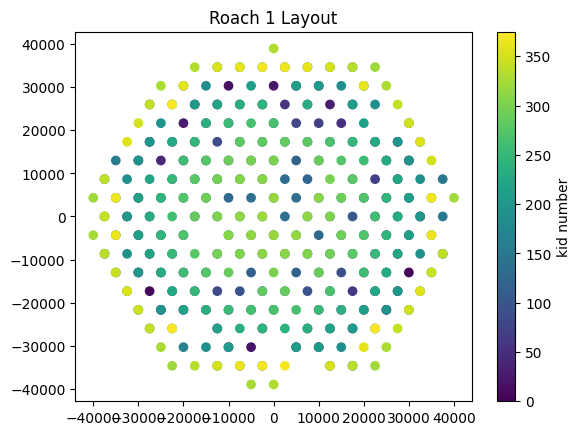

In [26]:
plt.scatter(layout['x'], layout['y'], c=range(layout.shape[0]))
plt.colorbar(label='kid number')
plt.title(f'Roach {roach} Layout')
plt.show()

In [57]:
# We want to make a square sample grid, so we discard every other row

x_vals = np.unique(layout['x'])
y_vals = np.unique(layout['y'])
print(f'{x_vals=}')
print(f'{y_vals=}')

every_other_y = y_vals[::2]

x_vals=array([-40000, -37500, -35000, -32500, -30000, -27500, -25000, -22500,
       -20000, -17500, -15000, -12500, -10000,  -7500,  -5000,  -2500,
            0,   2500,   5000,   7500,  10000,  12500,  15000,  17500,
        20000,  22500,  25000,  27500,  30000,  32500,  35000,  37500,
        40000])
y_vals=array([-38971.1431703 , -34641.01615138, -30310.88913246, -25980.76211353,
       -21650.63509461, -17320.50807569, -12990.38105677,  -8660.25403784,
        -4330.12701892,      0.        ,   4330.12701892,   8660.25403784,
        12990.38105677,  17320.50807569,  21650.63509461,  25980.76211353,
        30310.88913246,  34641.01615138,  38971.1431703 ])


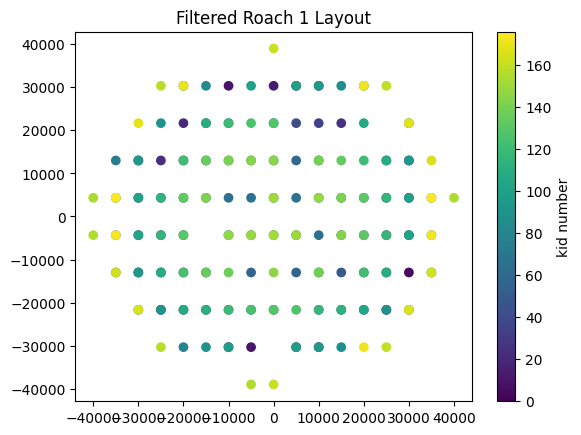

In [58]:
filtered_layout = layout[layout['y'].isin(every_other_y)]

plt.scatter(filtered_layout['x'], filtered_layout['y'], c=range(filtered_layout.shape[0]))
plt.colorbar(label='kid number')
plt.title(f'Filtered Roach {roach} Layout')
plt.show()

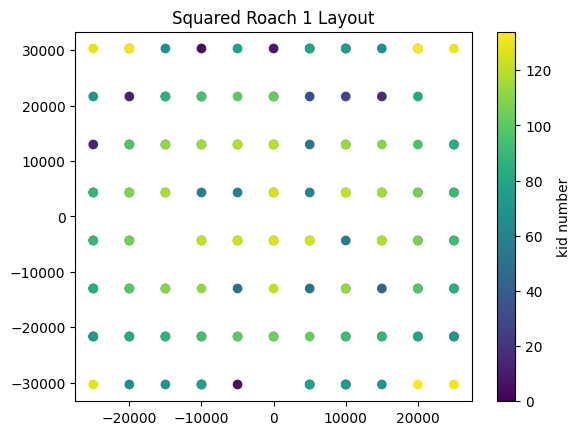

In [59]:
# crop to square
x_cropped = x_vals[(x_vals >= -25000) & (x_vals <= 25000)]
y_cropped = every_other_y[(every_other_y >= -30320) & (every_other_y <= 30320)]
square_layout = filtered_layout[filtered_layout['y'].isin(y_cropped) & filtered_layout['x'].isin(x_cropped)]

plt.scatter(square_layout['x'], square_layout['y'], c=range(square_layout.shape[0]))
plt.colorbar(label='kid number')
plt.title(f'Squared Roach {roach} Layout')
plt.show()

In [60]:
square_layout

,x,y
kid,,
0,25000,-21650.635095
1,-25000,-21650.635095
12,10000,-30310.889132
13,10000,30310.889132
14,-10000,-30310.889132
...,...,...
333,25000,30310.889132
334,25000,-30310.889132
364,-20000,30310.889132


In [64]:
def find_pairs(df: pd.DataFrame) -> list[tuple[int, int]]:

    kids = df.index

    pairs: list[tuple[int, int]] = []

    for kid1 in kids:
        for kid2 in kids:
            if kid1 >= kid2: continue
            if df['x'][kid1] == df['x'][kid2] and df['y'][kid1] == df['y'][kid2]:
                pairs.append((kid1, kid2))

    return pairs

all_pairs = find_pairs(layout)

print(f"Found {len(all_pairs)} pairs out of {layout.index.size} KIDs!")
all_pairs

Found 148 pairs out of 376 KIDs!


[(0, 197),
 (1, 198),
 (2, 199),
 (3, 200),
 (4, 201),
 (7, 202),
 (8, 203),
 (9, 204),
 (10, 205),
 (11, 206),
 (12, 207),
 (13, 208),
 (14, 209),
 (16, 210),
 (17, 211),
 (18, 212),
 (20, 213),
 (21, 215),
 (23, 216),
 (24, 217),
 (25, 218),
 (26, 219),
 (27, 220),
 (29, 222),
 (31, 223),
 (32, 224),
 (33, 225),
 (36, 227),
 (37, 228),
 (38, 229),
 (39, 230),
 (40, 231),
 (41, 232),
 (42, 233),
 (43, 234),
 (45, 235),
 (46, 236),
 (47, 237),
 (48, 238),
 (49, 239),
 (50, 240),
 (51, 242),
 (53, 243),
 (54, 244),
 (55, 245),
 (57, 247),
 (58, 248),
 (59, 249),
 (60, 250),
 (61, 251),
 (62, 252),
 (63, 253),
 (64, 254),
 (65, 255),
 (67, 256),
 (68, 257),
 (69, 258),
 (71, 259),
 (72, 260),
 (74, 261),
 (75, 263),
 (76, 264),
 (77, 265),
 (78, 266),
 (79, 268),
 (81, 271),
 (82, 272),
 (83, 273),
 (85, 274),
 (87, 275),
 (88, 276),
 (89, 277),
 (90, 278),
 (91, 280),
 (92, 281),
 (95, 283),
 (96, 284),
 (97, 285),
 (98, 286),
 (101, 287),
 (102, 288),
 (103, 289),
 (104, 290),
 (105, 2

In [62]:
square_pairs = find_pairs(square_layout)
print(f"Found {len(square_pairs)} pairs out of {square_layout.index.size} KIDs!")
# print(square_pairs)

Found 50 pairs out of 135 KIDs!
